 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Read-in-the-Mask-&amp;-Bathmetry-&amp;-et3" data-toc-modified-id="Read-in-the-Mask-&amp;-Bathmetry-&amp;-et3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in the Mask &amp; Bathmetry &amp; et3</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Calculate-e3v-and-e3u" data-toc-modified-id="Calculate-e3v-and-e3u-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Calculate e3v and e3u</a></span></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Plot-Boundaries" data-toc-modified-id="Plot-Boundaries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot Boundaries</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Calculate-Mean-Depths" data-toc-modified-id="Calculate-Mean-Depths-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Calculate Mean Depths</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Calculate-Volume-and-Area" data-toc-modified-id="Calculate-Volume-and-Area-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calculate Volume and Area</a></span></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Look-at-Velocity-Along-Boundary-Lines-for-2014" data-toc-modified-id="Look-at-Velocity-Along-Boundary-Lines-for-2014-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Look at Velocity Along Boundary Lines for 2014</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Total-Flux-Out" data-toc-modified-id="Total-Flux-Out-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Total Flux Out</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Interregion-Fluxes" data-toc-modified-id="Interregion-Fluxes-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Interregion Fluxes</a></span></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Thorium" data-toc-modified-id="Thorium-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Thorium</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Terms-in-the-Equations" data-toc-modified-id="Terms-in-the-Equations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Terms in the Equations</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#q:-Radioactive-Increase" data-toc-modified-id="q:-Radioactive-Increase-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>q: Radioactive Increase</a></span></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Sinking" data-toc-modified-id="Sinking-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sinking</a></span></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Vertical-Advection" data-toc-modified-id="Vertical-Advection-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Vertical Advection</a></span></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Horizontal-Advection-(into-and-out-of-region)" data-toc-modified-id="Horizontal-Advection-(into-and-out-of-region)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Horizontal Advection (into and out of region)</a></span></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Interregion-Flux" data-toc-modified-id="Interregion-Flux-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Interregion Flux</a></span></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Change-over-a-Year" data-toc-modified-id="Change-over-a-Year-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Change over a Year</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Loop-over-the-Years" data-toc-modified-id="Loop-over-the-Years-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loop over the Years</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/NewRegions_Susan-take3.ipynb#Fluxes-Bar-Plot" data-toc-modified-id="Fluxes-Bar-Plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fluxes Bar Plot</a></span></li></ul></li></ul></div>

In [1]:
import glob
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

%matplotlib inline

# Read in the Mask & Bathmetry & et3

In [2]:
deepmask = np.load('deep.npy')
shallowmask = np.load('shallow.npy')

In [3]:
bathy = xr.open_dataset(
    '../ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
nemolon = bathy['nav_lon'][400:,:]
nemolat = bathy['nav_lat'][400:,:]
bathy = bathy['Bathymetry'][400:,:]
print (bathy.shape)

(400, 544)


In [4]:
meshfile = '../crop.nc'
gdept0 = xr.open_dataset(meshfile)['gdept_0'][0]
gdepw0 = xr.open_dataset(meshfile)['gdepw_0'][0]
e1t = np.array(xr.open_dataset(meshfile)['e1t'][0, 400:])
e1v = xr.open_dataset(meshfile)['e1v'][0, 400:]
e2t = np.array(xr.open_dataset(meshfile)['e2t'][0, 400:])
e2u = xr.open_dataset(meshfile)['e2u'][0, 400:]
e3t = xr.open_dataset(meshfile)['e3t'][0, :, 400:]
tmask = np.array(xr.open_dataset(meshfile)['tmask'][0, :, 400:])
umask = xr.open_dataset(meshfile)['umask'][0, :, 400:]
vmask = xr.open_dataset(meshfile)['vmask'][0, :, 400:]
print (e3t.shape, gdept0.shape)

(50, 400, 544) (50,)


In [5]:
print (gdepw0[31:33])

<xarray.DataArray 'gdepw_0' (z: 2)>
array([495.718386, 590.29013 ])
Dimensions without coordinates: z


## Calculate e3v and e3u

In [6]:
e3u = np.load("e3u_crop.npy")
e3v = np.load("e3v_crop.npy")

## Plot Boundaries

/Users/sallen/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


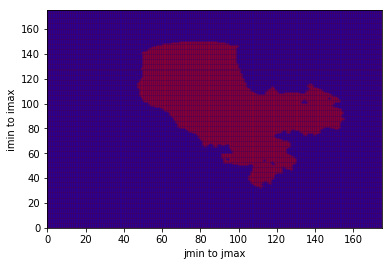

In [8]:
imin, imax = 175, 350
jmin, jmax = 125, 300
plt.pcolormesh(shallowmask[imin:imax, jmin:jmax])
plt.pcolormesh(deepmask[imin:imax, jmin:jmax], cmap='bwr', alpha=0.1)
plt.ylabel('imin to imax')
plt.xlabel('jmin to jmax');

### Calculate Mean Depths

In [10]:
sumdepth = 0.
sumarea = 0.
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if deepmask[i, j]:
            sumdepth += bathy[i, j] * e1t[i, j] * e2t[i, j]
            sumarea += e1t[i, j] * e2t[i, j]
print (sumdepth, sumarea, sumdepth/sumarea)

<xarray.DataArray 'Bathymetry' ()>
array(3171799710569637.5) 896703190837.0 <xarray.DataArray 'Bathymetry' ()>
array(3537.179016404013)


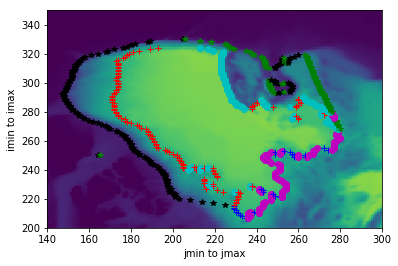

In [7]:
boundary_x = np.zeros_like(deepmask)
# 'deep to shallow' 1
# 'deep to outside' 2
# 'shallow to deep' 3
# 'outside to deep' 4
# 'shallow to outside' 5
# 'outside to shallow' 6
plt.pcolormesh(bathy)
for i in range(imin, imax):
        for j in range(jmin, jmax):
            if deepmask[i, j] and not deepmask[i, j+1]:
                if not shallowmask[i, j] and shallowmask[i, j+1]:
                    boundary_x[i, j] = 1
                    plt.plot(j, i, 'co')   # think this is all good
                else:
                    boundary_x[i, j] = 2
                    plt.plot(j, i, 'mo')   # think this is all good
            elif not deepmask[i, j] and deepmask[i, j+1]:
                if shallowmask[i, j] and not shallowmask[i, j+1]:
                    boundary_x[i, j] = 3
                    plt.plot(j, i, 'r+')
                else:
                    boundary_x[i, j] = 4
                    plt.plot(j, i, 'b+')
            elif shallowmask[i, j] and not shallowmask[i, j+1]:
                boundary_x[i, j] = 5
                plt.plot(j, i, 'g*')
            elif not shallowmask[i, j] and shallowmask[i, j+1]:
                boundary_x[i, j] = 6
                plt.plot(j, i, 'k*')
plt.ylim((200, 350))
plt.xlim((140, 300));
plt.ylabel('imin to imax')
plt.xlabel('jmin to jmax');

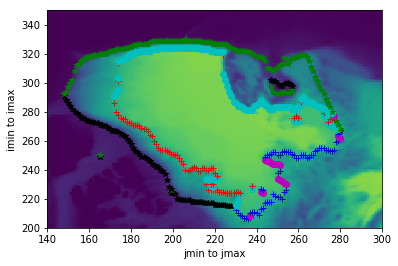

In [8]:
boundary_y = np.zeros_like(deepmask)
# 'deep to shallow' 1
# 'deep to outside' 2
# 'shallow to deep' 3
# 'outside to deep' 4
# 'shallow to outside' 5
# 'outside to shallow' 6
plt.pcolormesh(bathy)
for i in range(imin, imax):
        for j in range(jmin, jmax):
            if deepmask[i, j] and not deepmask[i+1, j]:
                if not shallowmask[i, j] and shallowmask[i+1, j]:
                    boundary_y[i, j] = 1
                    plt.plot(j, i, 'co')
                else:
                    boundary_y[i, j] = 2
                    plt.plot(j, i, 'mo')
            elif not deepmask[i, j] and deepmask[i+1, j]:
                if shallowmask[i, j] and not shallowmask[i+1, j]:
                    boundary_y[i, j] = 3
                    plt.plot(j, i, 'r+')
                else:
                    boundary_y[i, j] = 4
                    plt.plot(j, i, 'b+')
            elif shallowmask[i, j] and not shallowmask[i+1, j]:
                boundary_y[i, j] = 5
                plt.plot(j, i, 'g*')
            elif not shallowmask[i, j] and shallowmask[i+1, j]:
                boundary_y[i, j] = 6
                plt.plot(j, i, 'k*')# in y       
plt.ylim((200, 350))
plt.xlim((140, 300));
plt.ylabel('imin to imax')
plt.xlabel('jmin to jmax');

## Calculate Volume and Area

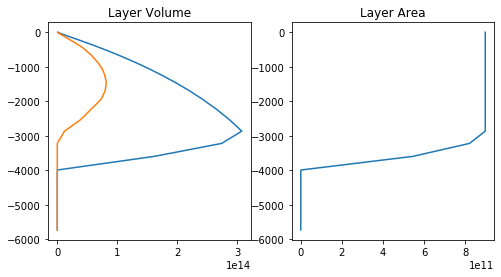

In [9]:
layer_volume_deep = np.zeros_like(gdept0)
layer_area_deep = np.zeros_like(gdept0)
layer_volume_shallow = np.zeros_like(gdept0)
layer_area_shallow = np.zeros_like(gdept0)
for layer in range(50):
    layer_volume_deep[layer] = np.sum(e1t * e2t * e3t[layer] * deepmask * tmask[layer])
    layer_area_deep[layer] = np.sum(e1t * e2t * deepmask * tmask[layer])
    layer_volume_shallow[layer] = np.sum(e1t * e2t * e3t[layer] * shallowmask * tmask[layer])
    layer_area_shallow[layer] = np.sum(e1t * e2t * shallowmask * tmask[layer])
                             
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(layer_volume_deep, -gdept0)
axs[0].plot(layer_volume_shallow, -gdept0)
axs[1].plot(layer_area_deep, -gdept0)
axs[1].plot(layer_area_shallow, -gdept0)
axs[0].set_title('Layer Volume')
axs[1].set_title('Layer Area');

## Look at Velocity Along Boundary Lines for 2014

In [10]:
def vel(keyword, T, ENG='EXH005'):
    """'design to obtain velocity field
    T: year, value: eg. 2002
    'ENG': string, can be ENG3,EXH001 or EXH005
    """
    # addstr='/ocean/xiaoxiny/research/result_jasper/data_eng3/'
    addstr = '../'
    if keyword =='U':
        nc_filename=sorted(glob.glob('%s/*%s*U*%s.nc'%(addstr,ENG,T)))
        with xr.open_dataset(nc_filename[0]) as uvel:
            data = uvel.variables['vozocrtx'][0,:,400:,:]
            data = np.ma.array(data, mask=1-umask, fill_value=0)
    elif keyword =='V':
        nc_filename=sorted(glob.glob('%s/*%s*V*%s.nc'%(addstr,ENG,T)))
        with xr.open_dataset(nc_filename[0]) as vvel:
            data = vvel.variables['vomecrty'][0,:,400:,:]
            data = np.ma.array(data, mask=1-vmask, fill_value=0)
    else:
        nc_filename=sorted(glob.glob('%s/*%s*W*%s.nc'%(addstr,ENG,T)))
        with xr.open_dataset(nc_filename[0]) as wvel:
            data = wvel.variables['vovecrtz'][0,:,400:,:]
            data = data.fillna(0)
            data = np.ma.array(data, mask=1-tmask, fill_value=0)
    return data

In [11]:
def find_fluxes(year):
    u_vel = vel('U', year)
    v_vel = vel('V', year)
    w_vel = vel('W', year)

    areax = np.zeros_like(e3u)
    areay = np.zeros_like(e3v)
    areaz = e1t * e2t
    wwvel = np.zeros_like(e3t)
    for layer in range(50):
        areax[layer] = e3u[layer] * e2u[:]
        areay[layer] = e3v[layer] * e1v[:]
        wwvel[layer] = w_vel[layer].filled() * areaz

    uuvel = np.array(u_vel.filled() * areax) 
    vvvel = np.array(v_vel.filled() * areay)
    wwvel = np.array(w_vel)
    return uuvel, vvvel, wwvel

### Total Flux Out

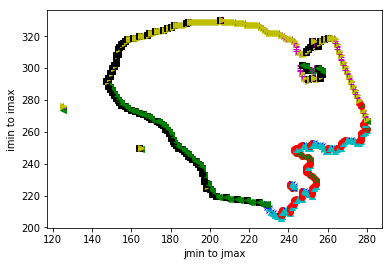

In [12]:
# 'deep to shallow' 1
# 'deep to outside' 2
# 'shallow to deep' 3
# 'outside to deep' 4
# 'shallow to outside' 5
# 'outside to shallow' 6
uuvel, vvvel, wwvel = find_fluxes(2014)
total_flux_out = np.zeros((8, 50))
for ii in range(imin, imax):
    for jj in range(jmin, jmax):
        if boundary_x[ii, jj] == 2:
            plt.plot(jj, ii, 'ro')
            total_flux_out[0] = total_flux_out[0] + (uuvel[:, ii, jj])
        elif boundary_x[ii, jj] == 4:
            plt.plot(jj, ii, 'bx')
            total_flux_out[1] = total_flux_out[1] - (uuvel[:, ii, jj])
        elif boundary_x[ii, jj] == 5:
            plt.plot(jj, ii, 'm+')
            total_flux_out[2] = total_flux_out[2] + (uuvel[:, ii, jj])
        elif boundary_x[ii, jj] == 6:
            plt.plot(jj, ii, 'ks')
            total_flux_out[3] = total_flux_out[3] - (uuvel[:, ii, jj])
        if boundary_y[ii, jj] == 2:
            plt.plot(jj, ii, 'g*')
            total_flux_out[4] = total_flux_out[4] + (vvvel[:, ii, jj])
        elif boundary_y[ii, jj] == 4:
            plt.plot(jj, ii, 'c^')
            total_flux_out[5] = total_flux_out[5] - vvvel[:, ii, jj]
        elif boundary_y[ii, jj] == 5:
            plt.plot(jj, ii, 'y>')
            total_flux_out[6] = total_flux_out[6] + vvvel[:, ii, jj]
        elif boundary_y[ii, jj] == 6:
            plt.plot(jj, ii, 'g<')
            total_flux_out[7] = total_flux_out[7] - vvvel[:, ii, jj]
plt.ylabel('imin to imax')
plt.xlabel('jmin to jmax');

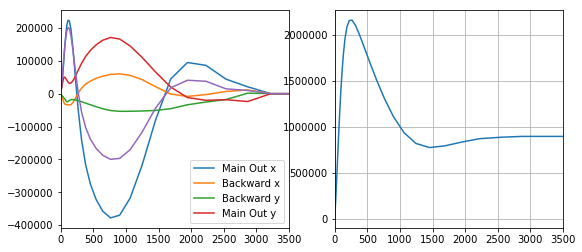

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].plot(gdept0, total_flux_out[0], label='Main Out x')
axs[0].plot(gdept0, total_flux_out[1], label='Backward x')
axs[0].plot(gdept0, total_flux_out[4], label='Backward y')
axs[0].plot(gdept0, total_flux_out[5], label='Main Out y')   
axs[0].plot(gdept0, total_flux_out[0] + total_flux_out[1] + total_flux_out[4] + total_flux_out[5])
axs[1].plot(gdept0, np.cumsum(total_flux_out[0] + total_flux_out[1] 
                           + total_flux_out[4] + total_flux_out[5]))
axs[0].legend()
axs[0].set_xlim(0, 3500);
axs[1].set_xlim(0, 3500);
axs[1].grid();

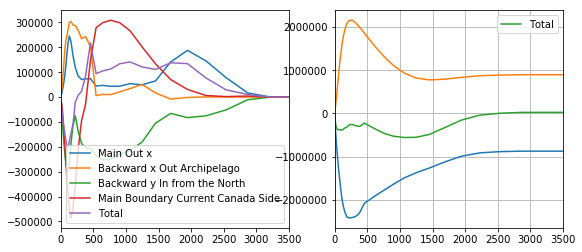

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].plot(gdept0, total_flux_out[2], label='Main Out x') # why is this OUT!
axs[0].plot(gdept0, total_flux_out[3], label='Backward x Out Archipelago') 
axs[0].plot(gdept0, total_flux_out[6], label='Backward y In from the North') 
axs[0].plot(gdept0, total_flux_out[7], label='Main Boundary Current Canada Side')
axs[0].plot(gdept0, total_flux_out[2] + total_flux_out[3] + total_flux_out[6] 
         + total_flux_out[7], label="Total")
axs[1].plot(gdept0, np.cumsum(total_flux_out[2] + total_flux_out[3] + total_flux_out[6] 
         + total_flux_out[7]))
axs[1].plot(gdept0, np.cumsum(total_flux_out[0] + total_flux_out[1] 
                           + total_flux_out[4] + total_flux_out[5]))
axs[1].plot(gdept0, np.cumsum(total_flux_out.sum(axis=0)), label='Total')
axs[0].legend()
axs[0].set_xlim(0, 3500);
axs[1].set_xlim(0, 3500);
axs[1].legend()
axs[1].grid();

In [15]:
yearsec = 86400 * 365.25
for layer in range(31, 40):
#    print (gdept0[layer])
#    print ((total_flux_out.sum(axis=0))[layer])
#    print (((wwvel[layer] - wwvel[layer+1]) * (shallowmask + deepmask)).sum())
    print (gdept0[layer].values, (total_flux_out.sum(axis=0))[layer] + 
          ((wwvel[layer] - wwvel[layer+1]) * (shallowmask + deepmask)).sum(),
          ((total_flux_out.sum(axis=0))[layer] + 
          ((wwvel[layer] - wwvel[layer+1]) * (shallowmask + deepmask)).sum())/
           (layer_volume_shallow[layer]+layer_volume_deep[layer]) * yearsec)

541.0889087402793 -72107.336271 -0.0170513369405
643.5668434071066 -82124.7501166 -0.0167386594337
763.3330509659515 -87344.415455 -0.015507124222
902.3393119059538 -63080.5591555 -0.00982227379381
1062.4397212448976 -29319.7463804 -0.00404882009948
1245.2911123592623 4201.18893869 0.000522162812337
1452.250937649381 66843.765208 0.00757372295625
1684.2844007920971 155839.824119 0.0164135312679
1941.8934007920975 175421.965041 0.0175281640097


Conservation within 2%.  Not sure I have the vertical fluxes right.

## Interregion Fluxes

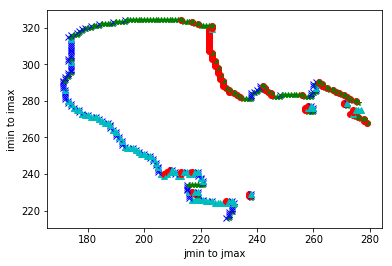

In [16]:
# 'deep to shallow' 1
# 'deep to outside' 2
# 'shallow to deep' 3
# 'outside to deep' 4
# 'shallow to outside' 5
# 'outside to shallow' 6
uuvel, vvvel, wwvel = find_fluxes(2014)
inter_region_flow = np.zeros((4, 50))    # we are calculating deep to shallow
for ii in range(imin, imax):
    for jj in range(jmin, jmax):
        if boundary_x[ii, jj] == 1:
            plt.plot(jj, ii, 'ro')
            inter_region_flow[0] = inter_region_flow[0] + uuvel[:, ii, jj]
        elif boundary_x[ii, jj] == 3:
            plt.plot(jj, ii, 'bx')
            inter_region_flow[1] = inter_region_flow[1] - uuvel[:, ii, jj]
        if boundary_y[ii, jj] == 1:
            plt.plot(jj, ii, 'g*')
            inter_region_flow[2] = inter_region_flow[2] + vvvel[:, ii, jj] 
        elif boundary_y[ii, jj] == 3:
            plt.plot(jj, ii, 'c^')
            inter_region_flow[3] = inter_region_flow[3] - vvvel[:, ii, jj] 
plt.ylabel('imin to imax')
plt.xlabel('jmin to jmax');

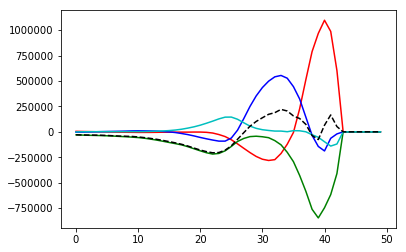

In [17]:
plt.plot(inter_region_flow[0], 'r') #deep to shallow' 1, x, red
plt.plot(inter_region_flow[1], 'b') #shallow to deep 3, x, blue
plt.plot(inter_region_flow[2], 'g') # deep to shallow, 1, y, green
plt.plot(inter_region_flow[3], 'c'); # shallow to deep 3, y cyan
plt.plot(inter_region_flow.sum(axis=0), 'k--');

/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


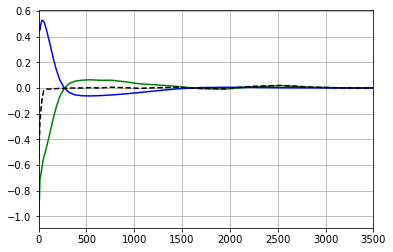

In [18]:
fig,ax = plt.subplots(1, 1)
ax.plot(gdept0, (inter_region_flow.sum(axis=0))/layer_volume_deep * yearsec, 'g');
ax.plot(gdept0, (total_flux_out[0] + total_flux_out[1] + total_flux_out[4] + total_flux_out[5])/layer_volume_deep * yearsec, 'b')
ax.plot(gdept0, (total_flux_out[0] + total_flux_out[1] + total_flux_out[4] + total_flux_out[5] +
        inter_region_flow.sum(axis=0))/layer_volume_deep * yearsec, 'k--')
ax.set_xlim(0, 3500);
ax.grid();

## Thorium

In [19]:
def get_tracer(yearin):
    nt = yearin - 1991 
    with nc.Dataset('../EXH005-btscav_v2_19912016.nc') as tracerfile:
        tr8 = tracerfile['TR_8'][nt, :]
        tr10 = tracerfile['TR_10'][nt, :]
        tr12 = tracerfile['TR_12'][nt, :]
        tt = tr8+tr10
        year = (tracerfile['time_counter'][nt]/(86400*365) + 1991 -0.5).astype(int)
        if (year != yearin):
            print ('problems!!')
    return tr8, tr10, tr12, tt

(50, 400, 544)


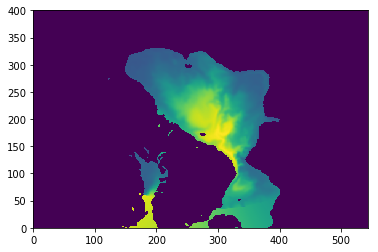

In [20]:
tr8, tr10, tr12, tt = get_tracer(2014)
plt.pcolormesh(tr8[31]);
print (tr12.shape)

# Terms in the Equations

## q: Radioactive Increase

In [10]:
year = 365 * 86400
Q = 0.0267 / year
radio_source_shallow = Q * layer_volume_shallow
radio_source_deep = Q * layer_volume_deep

## Sinking

In [22]:
def find_fac(tr12):
    with xr.open_dataset('../data_factor0.nc') as fac0file:
        fac0 = fac0file['factor0'][0, :,  400:,:]
    iceinput = tr12
    print (iceinput.shape)
    Ice_from_predifinelastlayer = np.array((iceinput * fac0).sum(axis=0))
    with xr.open_dataset('../data_factor.nc') as data:
        fac = data['factor'][0, :, 400:, :]
    return fac, Ice_from_predifinelastlayer

(50, 400, 544)


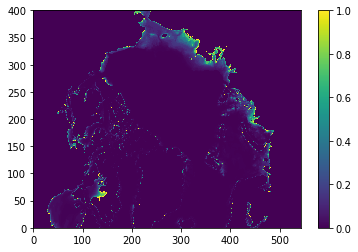

In [23]:
tr8, tr10, tr12, tt = get_tracer(2014)
fac, Ice_from_predefinelastlayer = find_fac(tr12)
plt.pcolormesh(fac[10])
plt.colorbar()

In [24]:
def callsinking(layer, ice0, Ice_from_predifinelastlayer, fac, tmask):
    "s0 = normal sinking; also consider enhanced sinking if within the enhanced layer - delta_s = enhanced sinking"
    c0, c1 = -986.96, 1456.45
    s0 = (c0*np.array(ice0) + c1) * tmask[layer]
    s_from_predifinelastlayer = c0*np.array(Ice_from_predifinelastlayer) + c1
    se = np.zeros_like(s0)
    s  = np.zeros_like(s0)

    for i in range (len(ice0[:,0])):
        for j in range (len(ice0[0,:])):
            se[i, j] = min((3*(1-Ice_from_predifinelastlayer[i, j])+1)
                           *s_from_predifinelastlayer[i, j], c1) 
    s = s0 + (se - s0) * fac
    return s 

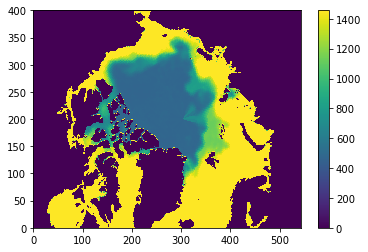

In [25]:
tr8, tr10, tr12, tt = get_tracer(2014)
layer = 10
TR_10_upperlayer = tr10[layer-1]
TR_10_currentlayer = tr10[layer]
TR_12_upperlayer = tr12[layer-1]
TR_12_currentlayer = tr12[layer]
s = callsinking(layer, TR_12_upperlayer,
                                  Ice_from_predifinelastlayer=Ice_from_predefinelastlayer,
                                    fac=fac[layer-1], tmask=tmask)
plt.pcolormesh(s)
plt.colorbar();

In [26]:
def find_deltasink(Ice_from_predifinelastlayer, fac, tr10, tr12):
    deltasink = np.zeros((50, 400, 544))
    for layer in range(50):
        TR_10_upperlayer = tr10[layer-1]
        TR_10_currentlayer = tr10[layer]
        TR_12_upperlayer = tr12[layer-1]
        TR_12_currentlayer = tr12[layer]
        sink_upperlayer = callsinking(layer, TR_12_upperlayer,
                                  Ice_from_predifinelastlayer=Ice_from_predefinelastlayer,
                                      fac=fac[layer-1], tmask=tmask)
        sink_currentlayer = callsinking(layer, TR_12_currentlayer,
                                    Ice_from_predifinelastlayer=Ice_from_predefinelastlayer,
                                               fac=fac[layer], tmask=tmask )
     
        deltasink[layer] = (sink_upperlayer*TR_10_upperlayer - sink_currentlayer*TR_10_currentlayer)
#    trb(:,:,jk-1,jpmyt4)*s_th(:,:,jk-1)-trb(:,:,jk,jpmyt4)*s_th(:,:,jk))*rdz(:,:,jk+1)
    return deltasink

In [27]:
def sum_deltasink(deltasink):
    layer_delta_sink_deep = np.zeros_like(gdept0)
    layer_delta_sink_shallow = np.zeros_like(gdept0)
    for layer in range(50):
        layer_delta_sink_deep[layer] = (np.sum(e1t * 
                                 e2t * tmask[layer] *
                                 deltasink[layer] *           
                                 deepmask)) 
        layer_delta_sink_shallow[layer] = (np.sum(e1t * 
                                 e2t * tmask[layer] *
                                 deltasink[layer] *           
                                 shallowmask))
    return layer_delta_sink_deep, layer_delta_sink_shallow

In [28]:
deltasink = find_deltasink(Ice_from_predefinelastlayer, fac, tr10, tr12)

In [29]:
layer_delta_sink_deep, layer_delta_sink_shallow = sum_deltasink(deltasink)
layer_delta_sink_deep = layer_delta_sink_deep / year
layer_delta_sink_shallow = layer_delta_sink_shallow / year

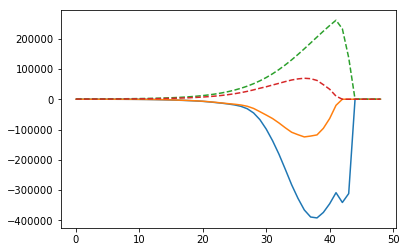

In [30]:
plt.plot(layer_delta_sink_deep[1:])
plt.plot(layer_delta_sink_shallow[1:])
plt.plot(radio_source_deep[1:], '--')
plt.plot(radio_source_shallow[1:], '--');

## Vertical Advection

In [31]:
def get_vertical_advection(tt, wwvel):
    vt_advection = np.zeros_like(tt)
    for i in range(49):
        tt_onwgrid = 0.5*(tt[i] + tt[i+1])
        vt_advection[i+1] = wwvel[i+1] * tt_onwgrid
    shallow_vertical_advection = (vt_advection * tmask * shallowmask).sum(axis=1).sum(axis=1)
    deep_vertical_advection = (vt_advection * tmask * deepmask).sum(axis=1).sum(axis=1)
    return deep_vertical_advection, shallow_vertical_advection

In [32]:
deep_vertical_advection, shallow_vertical_advection = get_vertical_advection(tt, wwvel)

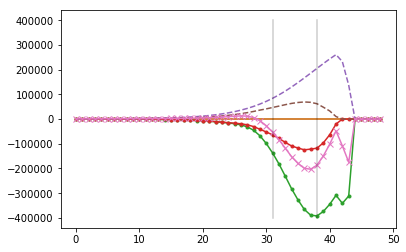

In [33]:
plt.plot(deep_vertical_advection[1:])
plt.plot(shallow_vertical_advection[1:]);
plt.plot(layer_delta_sink_deep[1:], '.-')
plt.plot(layer_delta_sink_shallow[1:], '.-')
plt.plot(radio_source_deep[1:], '--')
plt.plot(radio_source_shallow[1:], '--');
plt.plot(radio_source_deep[1:] + layer_delta_sink_deep[1:] + deep_vertical_advection[1:], 'x-')
plt.plot([31, 31], [-4e5, 4e5], 'k-', alpha=0.2)
plt.plot([38, 38], [-4e5, 4e5], 'k-', alpha=0.2);

## Horizontal Advection (into and out of region)

In [34]:
def calc_basin_out(year):
# 'deep to shallow' 1
# 'deep to outside' 2
# 'shallow to deep' 3
# 'outside to deep' 4
# 'shallow to outside' 5
# 'outside to shallow' 6
    uuvel, vvvel, wwvel = find_fluxes(year)
    tr8, tr10, tr12, tt = get_tracer(year)
    total_flux_out = np.zeros((8, 50))
    for ii in range(imin, imax):
        for jj in range(jmin, jmax):
            if boundary_x[ii, jj] == 2:
                plt.plot(jj, ii, 'ro')
                total_flux_out[0] = total_flux_out[0] + (uuvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii+1, jj]))
            elif boundary_x[ii, jj] == 4:
                plt.plot(jj, ii, 'bx')
                total_flux_out[1] = total_flux_out[1] - (uuvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii+1, jj]))
            elif boundary_x[ii, jj] == 5:
                plt.plot(jj, ii, 'm+')
                total_flux_out[2] = total_flux_out[2] + (uuvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii+1, jj]))
            elif boundary_x[ii, jj] == 6:
                plt.plot(jj, ii, 'ks')
                total_flux_out[3] = total_flux_out[3] - (uuvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii+1, jj]))
            if boundary_y[ii, jj] == 2:
                plt.plot(jj, ii, 'g*')
                total_flux_out[4] = total_flux_out[4] + (vvvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii, jj+1]))
            elif boundary_y[ii, jj] == 4:
                plt.plot(jj, ii, 'c^')
                total_flux_out[5] = total_flux_out[5] - vvvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii, jj+1])
            elif boundary_y[ii, jj] == 5:
                plt.plot(jj, ii, 'y>')
                total_flux_out[6] = total_flux_out[6] + vvvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii, jj+1])
            elif boundary_y[ii, jj] == 6:
                plt.plot(jj, ii, 'g<')
                total_flux_out[7] = total_flux_out[7] - vvvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii, jj+1])
    return total_flux_out

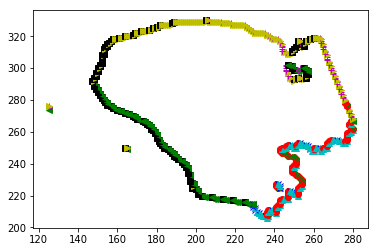

In [35]:
total_flux_out = calc_basin_out(2014)
deep_flux_out = total_flux_out[0] + total_flux_out[1] + total_flux_out[4] + total_flux_out[5]
shallow_flux_out = total_flux_out[2] + total_flux_out[3] + total_flux_out[6] + total_flux_out[7]

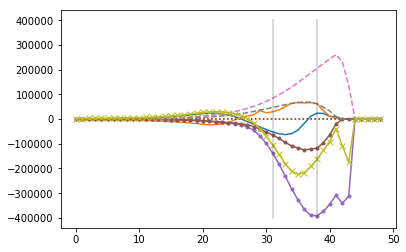

In [36]:
plt.plot(deep_flux_out[1:])
plt.plot(shallow_flux_out[1:])
plt.plot(deep_vertical_advection[1:], ':')
plt.plot(shallow_vertical_advection[1:], ':');
plt.plot(layer_delta_sink_deep[1:], '.-')
plt.plot(layer_delta_sink_shallow[1:], '.-')
plt.plot(radio_source_deep[1:], '--')
plt.plot(radio_source_shallow[1:], '--');
plt.plot(radio_source_deep[1:] + layer_delta_sink_deep[1:] + deep_vertical_advection[1:] + deep_flux_out[1:], 'x-')
plt.plot([31, 31], [-4e5, 4e5], 'k-', alpha=0.2)
plt.plot([38, 38], [-4e5, 4e5], 'k-', alpha=0.2);

## Interregion Flux

In [37]:
# 'deep to shallow' 1
# 'deep to outside' 2
# 'shallow to deep' 3
# 'outside to deep' 4
# 'shallow to outside' 5
# 'outside to shallow' 6
def calc_interregion(year):
    uuvel, vvvel, wwvel = find_fluxes(year)
    tr8, tr10, tr12, tt = get_tracer(year)
    inter_region_flux = np.zeros(50)    # we are calculating deep to shallow
    for ii in range(imin, imax):
        for jj in range(jmin, jmax):
            if boundary_x[ii, jj] == 1:
                plt.plot(jj, ii, 'ro')
                inter_region_flux = inter_region_flux + (uuvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii+1, jj]))
            elif boundary_x[ii, jj] == 3:
                plt.plot(jj, ii, 'bx')
                inter_region_flux = inter_region_flux - (uuvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii+1, jj]))
            if boundary_y[ii, jj] == 1:
                plt.plot(jj, ii, 'g*')
                inter_region_flux = inter_region_flux + (vvvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii, jj+1]))
            elif boundary_y[ii, jj] == 3:
                plt.plot(jj, ii, 'c^')
                inter_region_flux = inter_region_flux - vvvel[:, ii, jj] * 0.5*(tt[:, ii, jj] + tt[:, ii, jj+1])
    return inter_region_flux

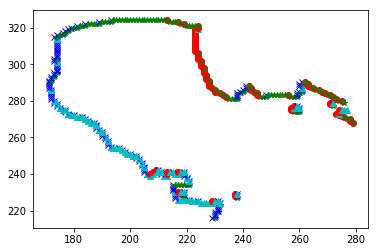

In [38]:
inter_region_flux = calc_interregion(2014)

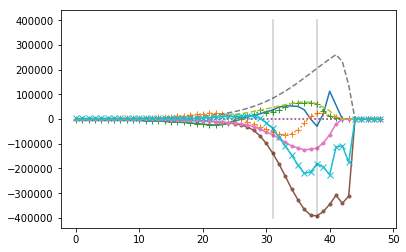

In [39]:
plt.plot(inter_region_flux[1:])
plt.plot(deep_flux_out[1:], '+:')
plt.plot(shallow_flux_out[1:], '+:')
plt.plot(deep_vertical_advection[1:], ':')
plt.plot(shallow_vertical_advection[1:], ':');
plt.plot(layer_delta_sink_deep[1:], '.-')
plt.plot(layer_delta_sink_shallow[1:], '.-')
plt.plot(radio_source_deep[1:], '--')
plt.plot(radio_source_shallow[1:], '--');
plt.plot(radio_source_deep[1:] + layer_delta_sink_deep[1:] + deep_vertical_advection[1:] - deep_flux_out[1:] -
         inter_region_flux[1:], 'x-')
plt.plot([31, 31], [-4e5, 4e5], 'k-', alpha=0.2)
plt.plot([38, 38], [-4e5, 4e5], 'k-', alpha=0.2);

## Change over a Year

In [40]:
def tracer_volume(tt):
    tracer_layer_volume_deep = np.zeros_like(gdept0)
    tracer_layer_volume_shallow = np.zeros_like(gdept0)
    for layer in range(50):
        tracer_layer_volume_deep[layer] = np.sum(tt[layer] * e1t * e2t * e3t[layer] * deepmask * tmask[layer])
        tracer_layer_volume_shallow[layer] = np.sum(tt[layer] * e1t * e2t * e3t[layer] * shallowmask * tmask[layer])
    
    return [tracer_layer_volume_deep, tracer_layer_volume_shallow]   

In [41]:
def calc_change(year):
    tr8_13, tr10_13, tr12_13, tt_13 = get_tracer(year-1)
    tr8_15, tr10_15, tr12_15, tt_15 = get_tracer(year+1)

    deep_change, shallow_change = tracer_volume(tt_15-tt_13)
    deep_change = deep_change/2/yearsec
    shallow_change = shallow_change/2/yearsec
    
    return deep_change, shallow_change

In [42]:
deep_change, shallow_change = calc_change(2014)

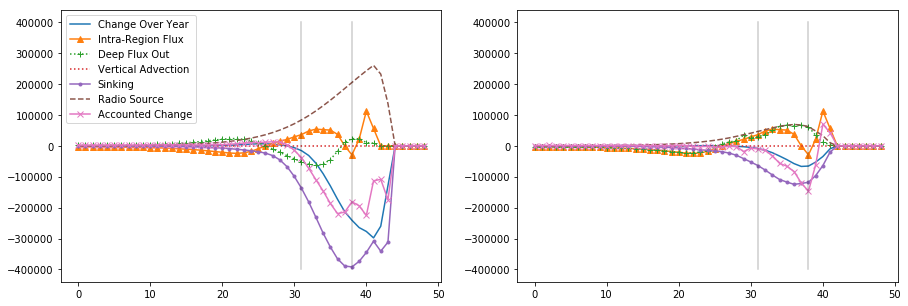

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(deep_change[1:], label="Change Over Year")
axs[1].plot(shallow_change[1:])
axs[0].plot(inter_region_flux[1:], '^-', label="Intra-Region Flux")
axs[1].plot(inter_region_flux[1:], '^-')
axs[0].plot(deep_flux_out[1:], '+:', label="Deep Flux Out")
axs[1].plot(shallow_flux_out[1:], '+:')
axs[0].plot(deep_vertical_advection[1:], ':', label="Vertical Advection")
axs[1].plot(shallow_vertical_advection[1:], ':');
axs[0].plot(layer_delta_sink_deep[1:], '.-', label="Sinking")
axs[1].plot(layer_delta_sink_shallow[1:], '.-')
axs[0].plot(radio_source_deep[1:], '--', label="Radio Source")
axs[1].plot(radio_source_shallow[1:], '--');
axs[0].plot(radio_source_deep[1:] + layer_delta_sink_deep[1:] + deep_vertical_advection[1:] - deep_flux_out[1:]
         - inter_region_flux[1:], 'x-', label="Accounted Change")
axs[1].plot(radio_source_shallow[1:] + layer_delta_sink_shallow[1:] + shallow_vertical_advection[1:]
         - shallow_flux_out[1:] + inter_region_flux[1:], 'x-')
axs[0].plot([31, 31], [-4e5, 4e5], 'k-', alpha=0.2)
axs[0].plot([38, 38], [-4e5, 4e5], 'k-', alpha=0.2);
axs[1].plot([31, 31], [-4e5, 4e5], 'k-', alpha=0.2)
axs[1].plot([38, 38], [-4e5, 4e5], 'k-', alpha=0.2);
axs[0].legend();

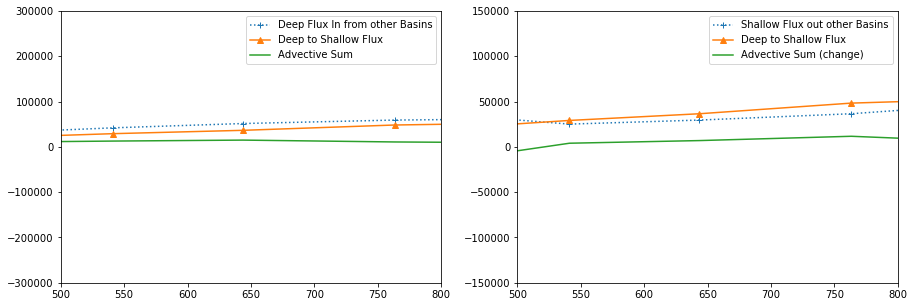

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(gdept0[1:], -deep_flux_out[1:], '+:', label="Deep Flux In from other Basins")
axs[0].plot(gdept0[1:], inter_region_flux[1:], '^-', label="Deep to Shallow Flux")
axs[0].plot(gdept0[1:], -deep_flux_out[1:] - inter_region_flux[1:], label='Advective Sum')
axs[0].set_xlim(500,800)
axs[0].set_ylim(-3e5, 3e5)
axs[0].legend()
axs[1].plot(gdept0[1:], shallow_flux_out[1:], '+:', label="Shallow Flux out other Basins")
axs[1].plot(gdept0[1:], inter_region_flux[1:], '^-', label="Deep to Shallow Flux")
axs[1].plot(gdept0[1:], -shallow_flux_out[1:] + inter_region_flux[1:], label='Advective Sum (change)')
axs[1].set_xlim(500,800)
axs[1].set_ylim(-1.5e5, 1.5e5)
axs[1].legend();

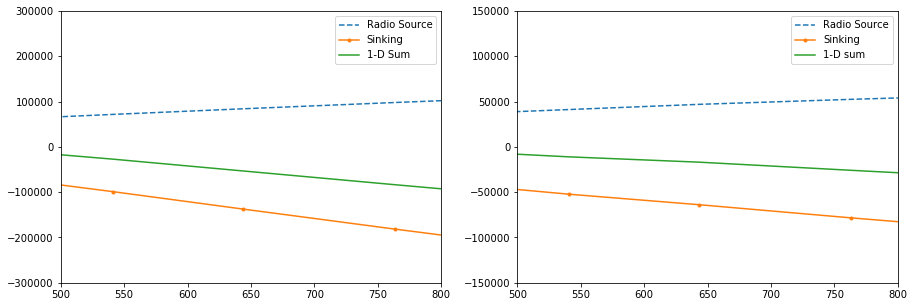

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(gdept0[1:], radio_source_deep[1:], '--', label="Radio Source")
axs[0].plot(gdept0[1:], layer_delta_sink_deep[1:], '.-', label="Sinking")
axs[0].plot(gdept0[1:], radio_source_deep[1:] + layer_delta_sink_deep[1:], label='1-D Sum')
axs[0].set_xlim(500,800)
axs[0].set_ylim(-3e5, 3e5)
axs[0].legend()
axs[1].plot(gdept0[1:], radio_source_shallow[1:], '--', label="Radio Source")
axs[1].plot(gdept0[1:], layer_delta_sink_shallow[1:], '.-', label="Sinking")
axs[1].plot(gdept0[1:], radio_source_shallow[1:] + layer_delta_sink_shallow[1:], label='1-D sum')
axs[1].set_xlim(500,800)
axs[1].set_ylim(-1.5e5, 1.5e5)
axs[1].legend();

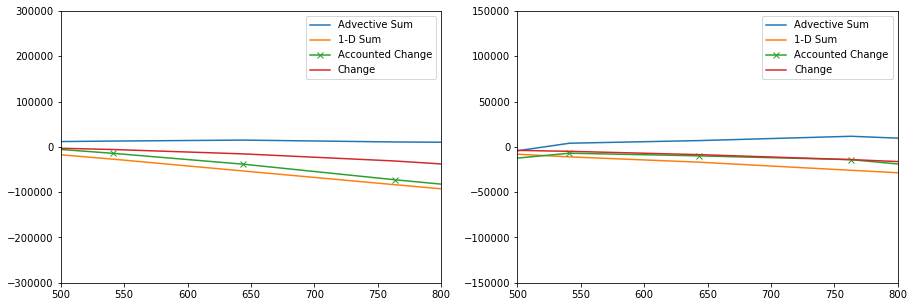

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(gdept0[1:], -deep_flux_out[1:] - inter_region_flux[1:], label='Advective Sum')
axs[0].plot(gdept0[1:], radio_source_deep[1:] + layer_delta_sink_deep[1:], label='1-D Sum')
axs[0].plot(gdept0[1:], radio_source_deep[1:] + layer_delta_sink_deep[1:] + deep_vertical_advection[1:] - deep_flux_out[1:]
         - inter_region_flux[1:], 'x-', label="Accounted Change")
axs[0].plot(gdept0[1:], deep_change[1:], label='Change')
axs[0].set_xlim(500,800)
axs[0].set_ylim(-3e5, 3e5)
axs[0].legend()
axs[1].plot(gdept0[1:], -shallow_flux_out[1:] + inter_region_flux[1:], label='Advective Sum')
axs[1].plot(gdept0[1:], radio_source_shallow[1:] + layer_delta_sink_shallow[1:], label='1-D Sum')
axs[1].plot(gdept0[1:], radio_source_shallow[1:] + layer_delta_sink_shallow[1:] + shallow_vertical_advection[1:] 
            - shallow_flux_out[1:]
         + inter_region_flux[1:], 'x-', label="Accounted Change")
axs[1].plot(gdept0[1:], shallow_change[1:], label='Change')
axs[1].set_xlim(500,800)
axs[1].set_ylim(-1.5e5, 1.5e5)
axs[1].legend();

# Loop over the Years

ylayer_delta_sink_deep, ylayer_delta_sink_shallow = np.zeros((12, 50)), np.zeros((12, 50))
ydeep_flux_out, yshallow_flux_out = np.zeros((12, 50)), np.zeros((12, 50))
yinter_region_flux = np.zeros((12, 50))
ydeep_change, yshallow_change = np.zeros((12, 50)), np.zeros((12, 50))
ydeep_vertical_advection, yshallow_vertical_advection = np.zeros((12, 50)), np.zeros((12, 50))

In [47]:
ylayer_delta_sink_deep = np.load("ylayer_delta_sink_deep.npy")
ylayer_delta_sink_shallow = np.load("ylayer_delta_sink_shallow.npy")
ydeep_flux_out = np.load("ydeep_flux_out.npy")
yshallow_flux_out = np.load("yshallow_flux_out.npy")
yinter_region_flux = np.load("yinter_region_flux.npy")
ydeep_change = np.load("ydeep_change.npy")
yshallow_change = np.load("yshallow_change.npy")
ydeep_vertical_advection = np.load("ydeep_vertical_advection.npy")
yshallow_vertical_advection = np.load("yshallow_vertical_advection.npy")

(50, 400, 544)
(50, 400, 544)
(50, 400, 544)


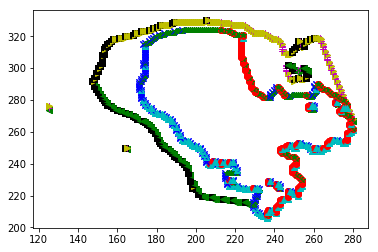

In [48]:
for iic, yearin in enumerate(range(2012, 2015)):
    ic = iic + 9
    # radio is trivial
    # sinking
    tr8, tr10, tr12, tt = get_tracer(yearin)
    fac, Ice_from_predefinelastlayer = find_fac(tr12)
    deltasink = find_deltasink(Ice_from_predefinelastlayer, fac, tr10, tr12)
    layer_delta_sink_deep, layer_delta_sink_shallow = sum_deltasink(deltasink)
    ylayer_delta_sink_deep[ic] = layer_delta_sink_deep / yearsec
    ylayer_delta_sink_shallow[ic] = layer_delta_sink_shallow / yearsec
    # out of basin flux
    total_flux_out = calc_basin_out(yearin)
    ydeep_flux_out[ic] = total_flux_out[0] + total_flux_out[1] + total_flux_out[4] + total_flux_out[5]
    yshallow_flux_out[ic] = total_flux_out[2] + total_flux_out[3] + total_flux_out[6] + total_flux_out[7]
    # inter-region flux
    yinter_region_flux[ic] = calc_interregion(yearin)
    # vertical advection
    uuvel, vvvel, wwvel = find_fluxes(yearin)
    ydeep_vertical_advection[ic], yshallow_vertical_advection[ic] = get_vertical_advection(tt, wwvel)
    # change over a year
    ydeep_change[ic], yshallow_change[ic] = calc_change(yearin)

In [49]:
np.save("ylayer_delta_sink_deep", ylayer_delta_sink_deep)
np.save("ylayer_delta_sink_shallow", ylayer_delta_sink_shallow)
np.save("ydeep_flux_out", ydeep_flux_out)
np.save("yshallow_flux_out", yshallow_flux_out)
np.save("yinter_region_flux", yinter_region_flux)
np.save("ydeep_change", ydeep_change)
np.save("yshallow_change", yshallow_change)
np.save("ydeep_vertical_advection", ydeep_vertical_advection)
np.save("yshallow_vertical_advection", yshallow_vertical_advection)

## Fluxes Bar Plot

In [6]:
ylayer_delta_sink_deep = np.load("ylayer_delta_sink_deep.npy")
ylayer_delta_sink_shallow = np.load("ylayer_delta_sink_shallow.npy")
ydeep_flux_out = np.load("ydeep_flux_out.npy")
yshallow_flux_out = np.load("yshallow_flux_out.npy")
yinter_region_flux = np.load("yinter_region_flux.npy")
ydeep_change = np.load("ydeep_change.npy")
yshallow_change = np.load("yshallow_change.npy")
ydeep_vertical_advection = np.load("ydeep_vertical_advection.npy")
yshallow_vertical_advection = np.load("yshallow_vertical_advection.npy")

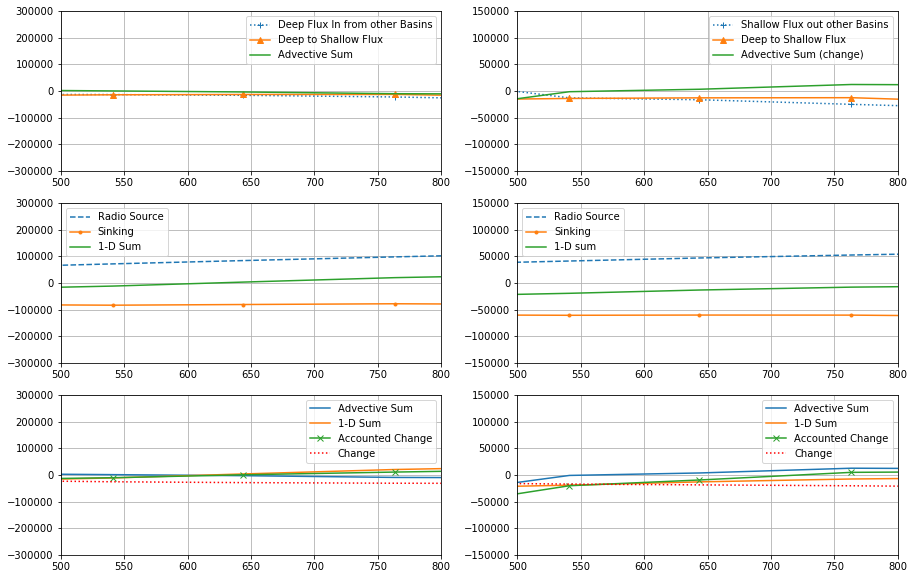

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
axs[0, 0].plot(gdept0[1:], -ydeep_flux_out[0, 1:], '+:', label="Deep Flux In from other Basins")
axs[0, 0].plot(gdept0[1:], yinter_region_flux[0, 1:], '^-', label="Deep to Shallow Flux")
axs[0, 0].plot(gdept0[1:], -ydeep_flux_out[0, 1:] - yinter_region_flux[0, 1:], label='Advective Sum')
axs[0, 0].set_xlim(500,800)
axs[0, 0].set_ylim(-3e5, 3e5)
axs[0, 0].legend()
axs[0, 0].grid()
axs[0, 1].plot(gdept0[1:], yshallow_flux_out[0, 1:], '+:', label="Shallow Flux out other Basins")
axs[0, 1].plot(gdept0[1:], yinter_region_flux[0, 1:], '^-', label="Deep to Shallow Flux")
axs[0, 1].plot(gdept0[1:], -yshallow_flux_out[0, 1:] + yinter_region_flux[0, 1:], label='Advective Sum (change)')
axs[0, 1].set_xlim(500,800)
axs[0, 1].set_ylim(-1.5e5, 1.5e5)
axs[0, 1].legend()
axs[0, 1].grid()

axs[1, 0].plot(gdept0[1:], radio_source_deep[1:], '--', label="Radio Source")
axs[1, 0].plot(gdept0[1:], ylayer_delta_sink_deep[0, 1:], '.-', label="Sinking")
axs[1, 0].plot(gdept0[1:], radio_source_deep[1:] + ylayer_delta_sink_deep[0, 1:], label='1-D Sum')
axs[1, 0].set_xlim(500,800)
axs[1, 0].set_ylim(-3e5, 3e5)
axs[1, 0].legend()
axs[1, 0].grid()
axs[1, 1].plot(gdept0[1:], radio_source_shallow[1:], '--', label="Radio Source")
axs[1, 1].plot(gdept0[1:], ylayer_delta_sink_shallow[0, 1:], '.-', label="Sinking")
axs[1, 1].plot(gdept0[1:], radio_source_shallow[1:] + ylayer_delta_sink_shallow[0, 1:], label='1-D sum')
axs[1, 1].set_xlim(500,800)
axs[1, 1].set_ylim(-1.5e5, 1.5e5)
axs[1, 1].legend()
axs[1, 1].grid()

axs[2, 0].plot(gdept0[1:], -ydeep_flux_out[0, 1:] - yinter_region_flux[0, 1:], label='Advective Sum')
axs[2, 0].plot(gdept0[1:], radio_source_deep[1:] + ylayer_delta_sink_deep[0, 1:], label='1-D Sum')
axs[2, 0].plot(gdept0[1:], radio_source_deep[1:] + ylayer_delta_sink_deep[0, 1:] 
               + ydeep_vertical_advection[0, 1:] - ydeep_flux_out[0, 1:]
         - yinter_region_flux[0, 1:], 'x-', label="Accounted Change")
axs[2, 0].plot(gdept0[1:], ydeep_change[0, 1:], ':r', label='Change')
axs[2, 0].set_xlim(500,800)
axs[2, 0].set_ylim(-3e5, 3e5)
axs[2, 0].legend()
axs[2, 0].grid()

axs[2, 1].plot(gdept0[1:], -yshallow_flux_out[0, 1:] + yinter_region_flux[0, 1:], label='Advective Sum')
axs[2, 1].plot(gdept0[1:], radio_source_shallow[1:] + ylayer_delta_sink_shallow[0, 1:], label='1-D Sum')
axs[2, 1].plot(gdept0[1:], radio_source_shallow[1:] + ylayer_delta_sink_shallow[0, 1:] + yshallow_vertical_advection[0, 1:] 
            - yshallow_flux_out[0, 1:]
         + yinter_region_flux[0, 1:], 'x-', label="Accounted Change")
axs[2, 1].plot(gdept0[1:], yshallow_change[0, 1:], ':r', label='Change')
axs[2, 1].set_xlim(500,800)
axs[2, 1].set_ylim(-1.5e5, 1.5e5)
axs[2, 1].legend()
axs[2, 1].grid();

<xarray.DataArray 'gdept_0' ()>
array(541.088909)


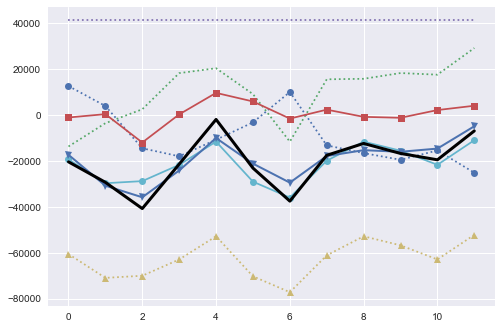

In [16]:
level = 31
print (gdept0[level])
plt.plot(-yshallow_flux_out[:, level], 'o:')
plt.plot(yinter_region_flux[:, level], 'x:')
plt.plot(yinter_region_flux[:, level] -yshallow_flux_out[:, level], 's-')
plt.plot(radio_source_shallow[level]*np.ones(12), '+:')
plt.plot(ylayer_delta_sink_shallow[:, level], '^:')
plt.plot(radio_source_shallow[level]*np.ones(12) + ylayer_delta_sink_shallow[:, level], 'o-')
plt.plot(yshallow_change[:, level], 'v-', linewidth=2)
plt.plot((radio_source_shallow[level]*np.ones(12) + ylayer_delta_sink_shallow[:, level] +
        yinter_region_flux[:, level] -yshallow_flux_out[:, level] + yshallow_vertical_advection[:, level]), 'k-', linewidth=3)

In [24]:
print (radio_source_shallow[level]*3, ylayer_delta_sink_shallow[1:4, level].sum(axis=0))
print (yinter_region_flux[1:4, level].sum(axis=0), -yshallow_flux_out[1:4, level].sum(axis=0))
print (yshallow_change[1:4, level].sum(axis=0))

123751.332331 -203969.36164
17240.1485986 -28517.3734014
-90787.8641771


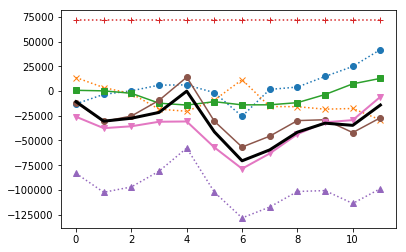

In [25]:
plt.plot(-ydeep_flux_out[:, level], 'o:')
plt.plot(-yinter_region_flux[:, level], 'x:')
plt.plot(-yinter_region_flux[:, level] -ydeep_flux_out[:, level], 's-')
plt.plot(radio_source_deep[level]*np.ones(12), '+:')
plt.plot(ylayer_delta_sink_deep[:, level], '^:')
plt.plot(radio_source_deep[level]*np.ones(12) + ylayer_delta_sink_deep[:, level], 'o-')
plt.plot(ydeep_change[:, level], 'v-', linewidth=2)
plt.plot((radio_source_deep[level]*np.ones(12) + ylayer_delta_sink_deep[:, level] -
        yinter_region_flux[:, level] -ydeep_flux_out[:, level] + ydeep_vertical_advection[:, level]), 'k-', 
         linewidth=3);

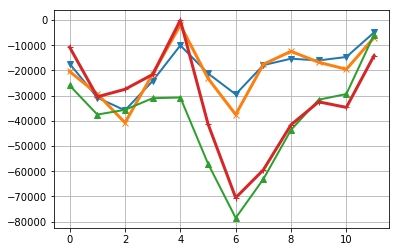

In [26]:
plt.plot(yshallow_change[:, level], 'v-', linewidth=2)
plt.plot((radio_source_shallow[level]*np.ones(12) + ylayer_delta_sink_shallow[:, level] +
        yinter_region_flux[:, level] -yshallow_flux_out[:, level] + yshallow_vertical_advection[:, level]), 'x-', 
         linewidth=3)
plt.plot(ydeep_change[:, level], '^-', linewidth=2)
plt.plot((radio_source_deep[level]*np.ones(12) + ylayer_delta_sink_deep[:, level] -
        yinter_region_flux[:, level] -ydeep_flux_out[:, level] + ydeep_vertical_advection[:, level]), '+-', 
         linewidth=3)
plt.grid()

In [27]:
print (ydeep_change[:, level].sum())
print (yshallow_change[:, level].sum())
print ((radio_source_deep[level]*np.ones(12) + ylayer_delta_sink_deep[:, level] -
        yinter_region_flux[:, level] -ydeep_flux_out[:, level] + ydeep_vertical_advection[:, level]).sum())
print ((radio_source_shallow[level]*np.ones(12) + ylayer_delta_sink_shallow[:, level] +
        yinter_region_flux[:, level] -yshallow_flux_out[:, level] + yshallow_vertical_advection[:, level]).sum())

-469908.564644
-237456.893195
-384360.608644
-247515.296891


In the deep we see a bigger change than we would expect because we are mixing in less concentrated water.  
In the shallow we see slightly smaller change than expected.

In [28]:
print (ydeep_change[:, level].sum() + yshallow_change[:, level].sum())

-707365.457838


In [17]:
scale = 1e6
bars = {'RadioSource': radio_source_shallow[level]*12/scale,
       'Sinking': ylayer_delta_sink_shallow[:, level].sum()/scale,
       'Inter-region Advection': yinter_region_flux[:, level].sum()/scale,
       'Advection from Outside': -yshallow_flux_out[:, level].sum()/scale,
       'Vertical Advection': yshallow_vertical_advection[:, level].sum()/scale,
       'Sum': (radio_source_shallow[level]*np.ones(12) + ylayer_delta_sink_shallow[:, level] +
        yinter_region_flux[:, level] -yshallow_flux_out[:, level] 
               + yshallow_vertical_advection[:, level]).sum()/scale,
       'Net Change': yshallow_change[:, level].sum()/scale}
colours = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
barslist = list(bars.keys())
barslist.insert(0, 'blank')
barsdeep = {'RadioSource': radio_source_deep[level]*12/scale,
       'Sinking': ylayer_delta_sink_deep[:, level].sum()/scale,
       'Inter-region Advection': -yinter_region_flux[:, level].sum()/scale,
       'Advection from Outside': -ydeep_flux_out[:, level].sum()/scale,
       'Vertical Advection': ydeep_vertical_advection[:, level].sum()/scale,
       'Sum': (radio_source_deep[level]*np.ones(12) + ylayer_delta_sink_deep[:, level] -
        yinter_region_flux[:, level] -ydeep_flux_out[:, level] 
               + ydeep_vertical_advection[:, level]).sum()/scale,
       'Net Change': ydeep_change[:, level].sum()/scale}
barsdeeplist = list(barsdeep.keys())
barsdeeplist.insert(0, 'blank')

In [13]:
import matplotlib as mpl
mpl.style.use('seaborn')
plt.rcParams.update({'font.size': 10})

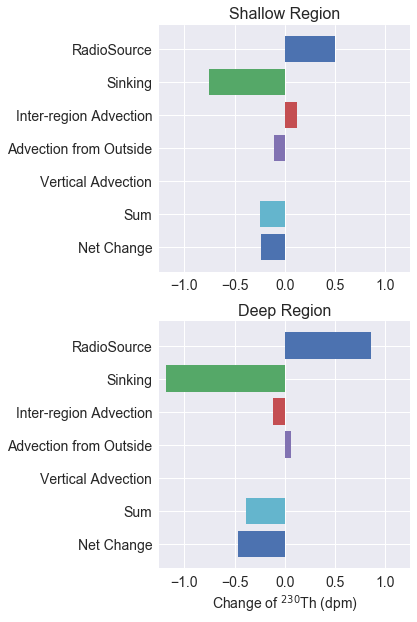

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(4.5, 10))
axs[0].barh(range(len(bars)), list(bars.values()), align='center', color=colours)
axs[0].set_yticklabels(barslist, fontsize=14)
axs[0].invert_yaxis()
#axs[0].set_xlabel('Change of $^{230}$Th (dpm m$^3$)');
axs[1].barh(range(len(barsdeep)), list(barsdeep.values()), align='center', color=colours)
axs[1].set_yticklabels(barsdeeplist, fontsize=14)
axs[1].invert_yaxis()
axs[1].set_xlabel('Change of $^{230}$Th (dpm)', fontsize=14);
for tick in axs[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in axs[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
axs[1].set_xlim(-1.25, 1.25)
axs[0].set_xlim(-1.25, 1.25);
#fig.tight_layout();
axs[0].set_title('Shallow Region', fontsize=16)
axs[1].set_title('Deep Region', fontsize=16)
fig.savefig('netfluxes_vertical.pdf')